In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")

Library


In [3]:
import os
#os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp')
#reading data
veri=pd.read_csv('hmelq.csv')
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [5]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [6]:
veri=veri.dropna()
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [7]:
veri.isnull().values.any()

False

In [8]:
veri.corr()
##value ile mortdue arasında yüksek korelasyon çıkmış (0,867)

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,0.235700,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,0.281008,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,-0.090830,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.109951,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,-0.012602,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147


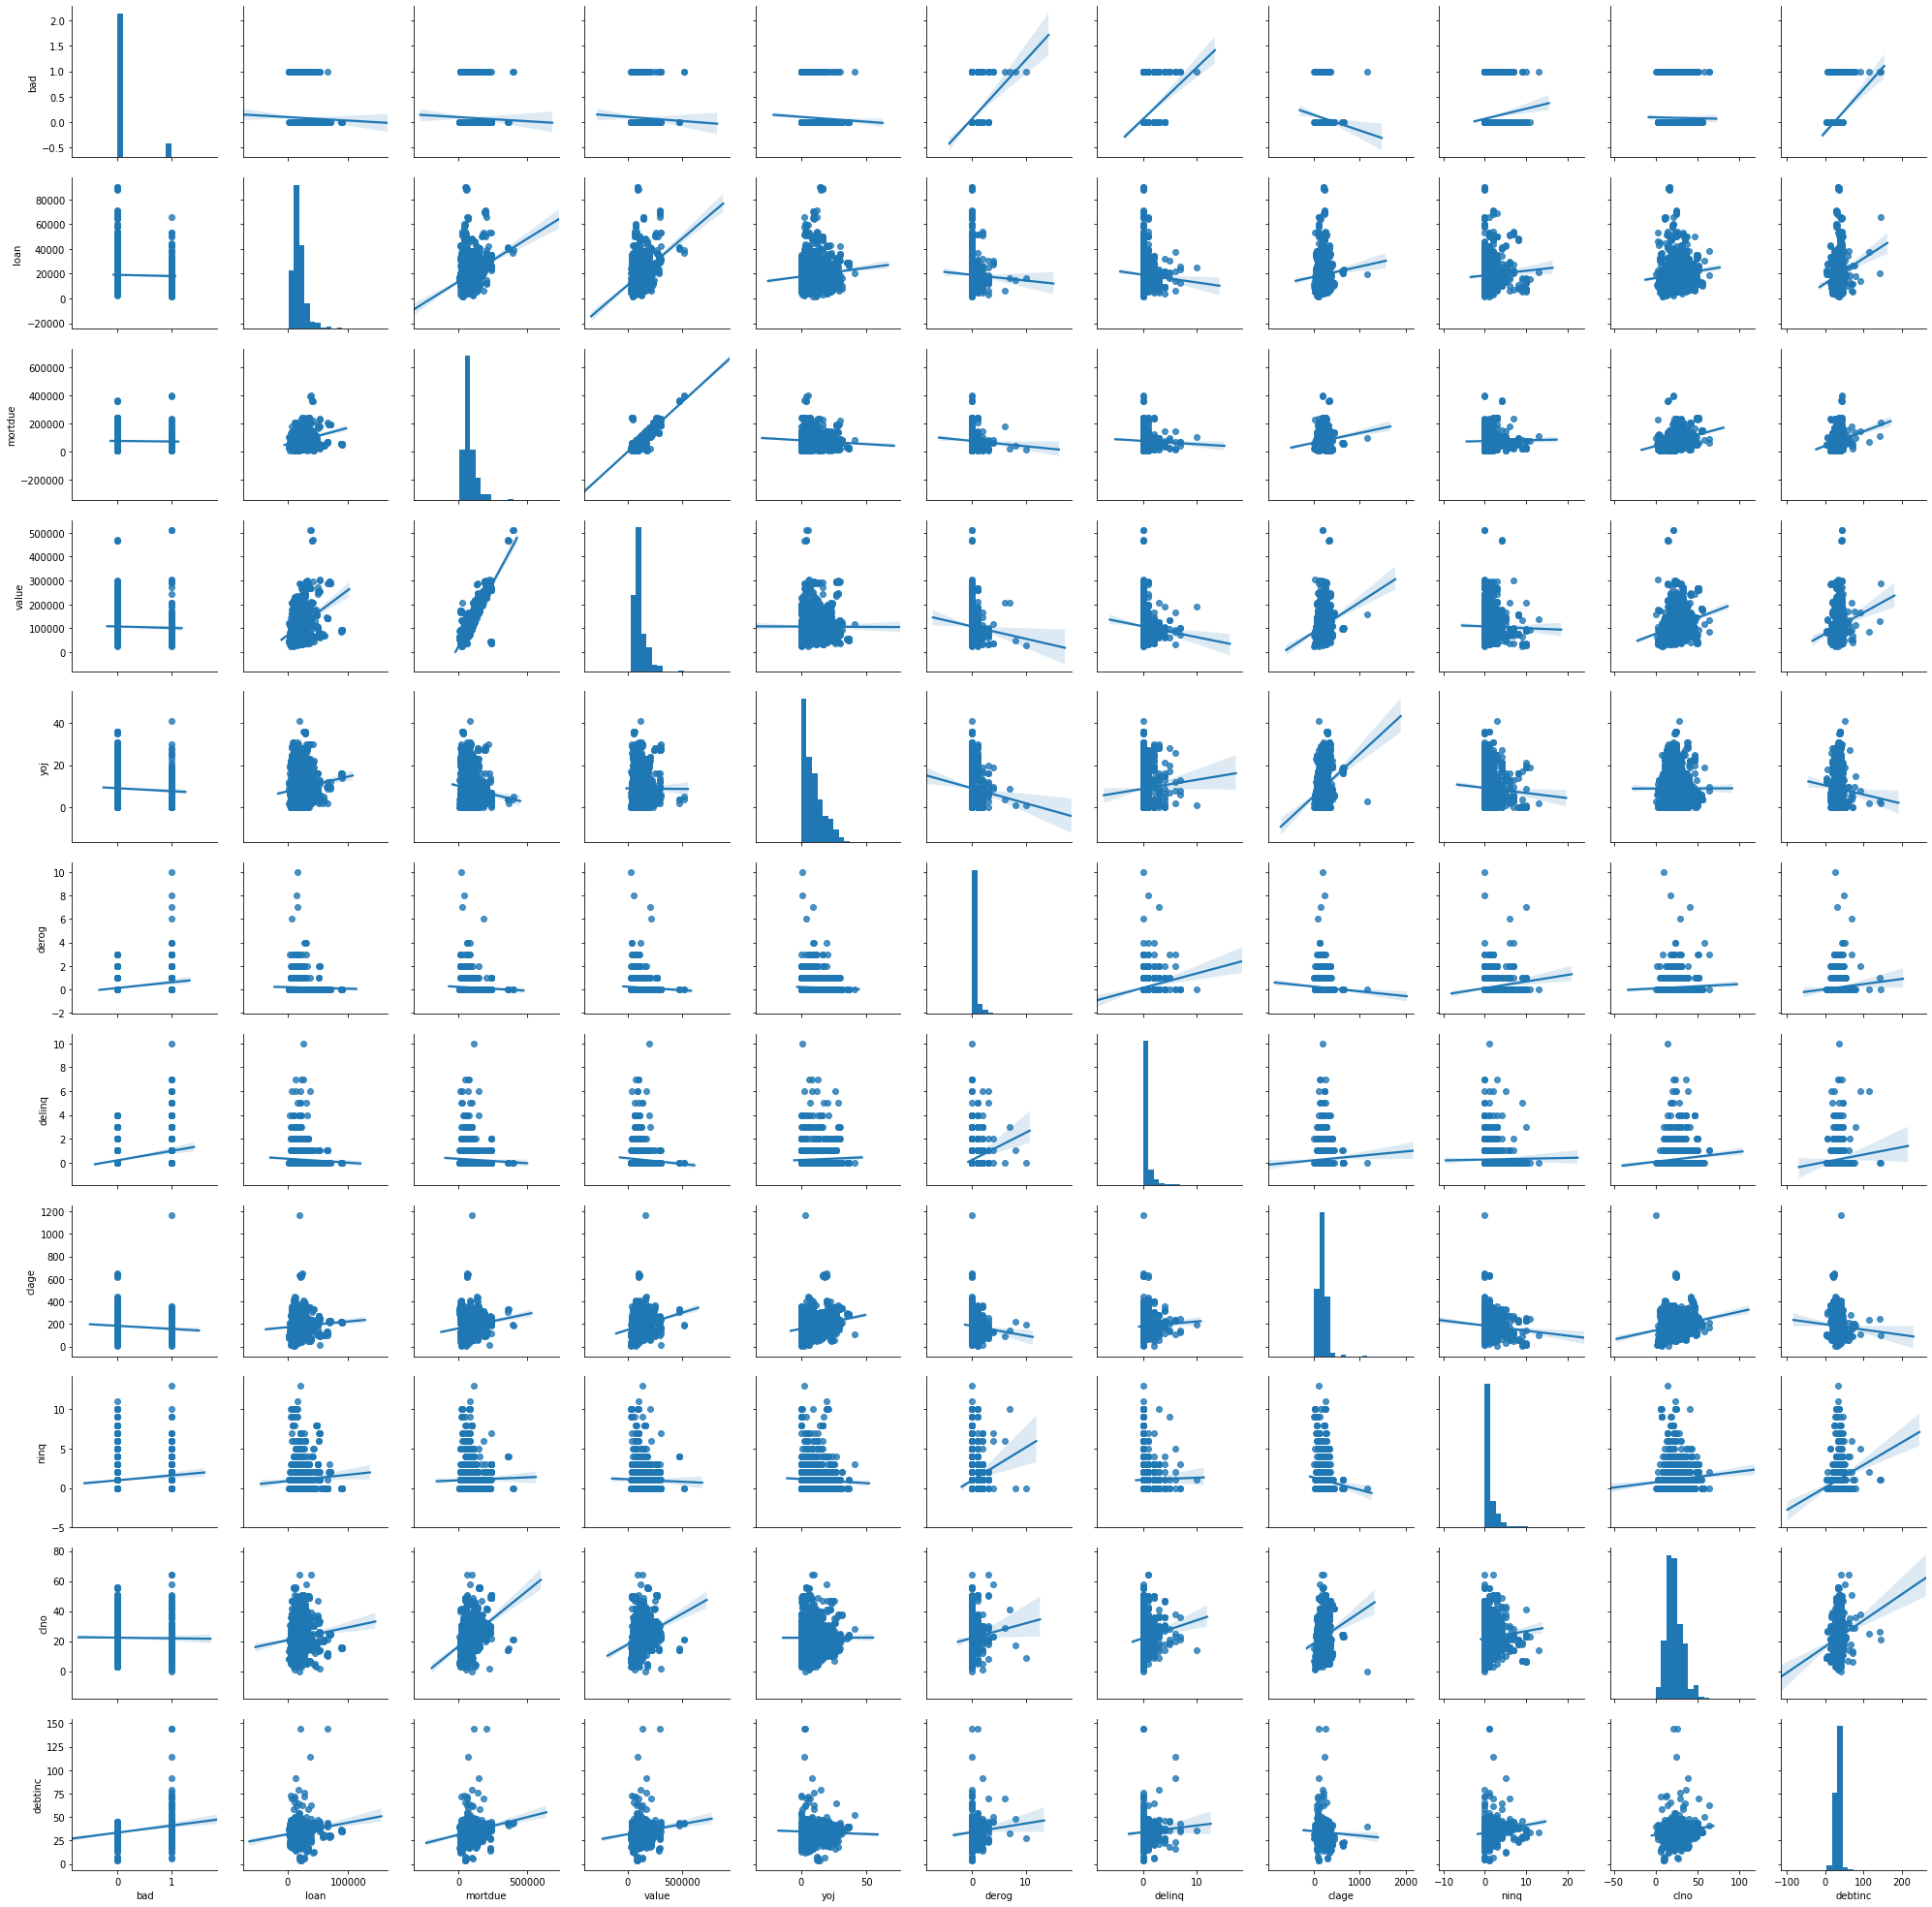

In [9]:
import seaborn as sns
sns.pairplot(veri,kind="reg") ###fit linear regression

##grafiklere bakıldığında y(predict)=xalue olursa, x'in mortdue,clno,loan ile ilişkilendirebilirim.
### aynı şekilde  y(predict)= mortdue olursa clno,value,loan ile ilişkilendirebilirim.
#Tüm bunların regresyon grafiklerini çıkaralım

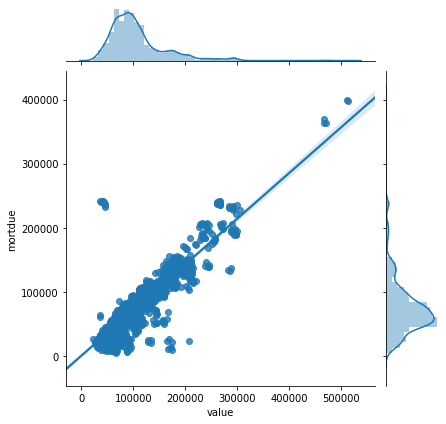

In [10]:
sns.jointplot(x="value", y="mortdue",data=veri, kind="reg")

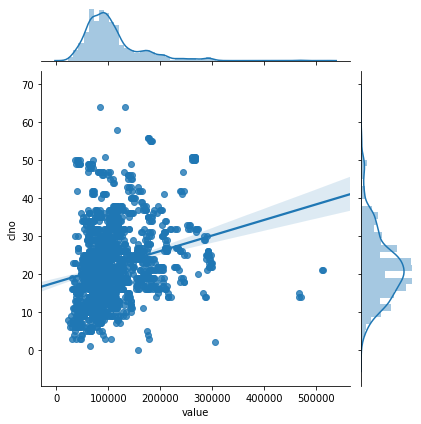

In [11]:
sns.jointplot(x="value", y="clno",data=veri, kind="reg")

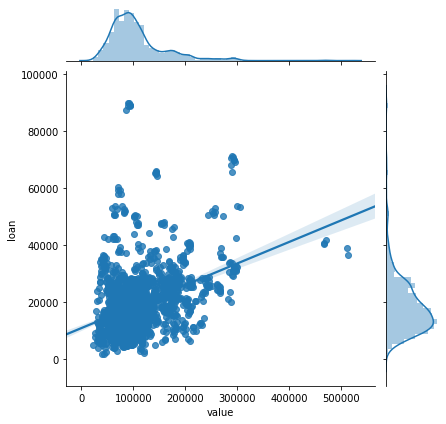

In [12]:
sns.jointplot(x="value", y="loan",data=veri, kind="reg")

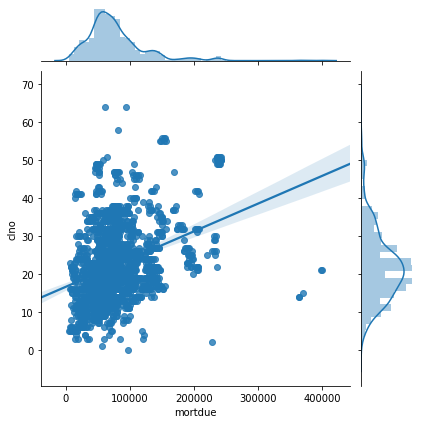

In [13]:
sns.jointplot(x="mortdue", y="clno",data=veri, kind="reg")

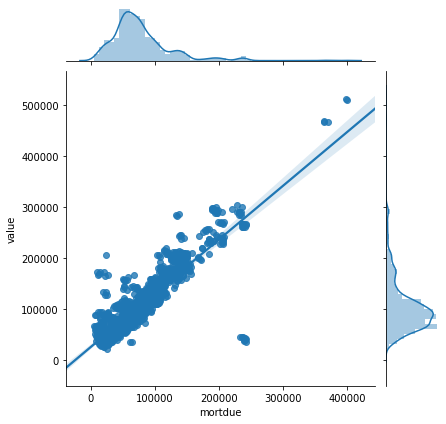

In [14]:
sns.jointplot(x="mortdue", y="value",data=veri, kind="reg")

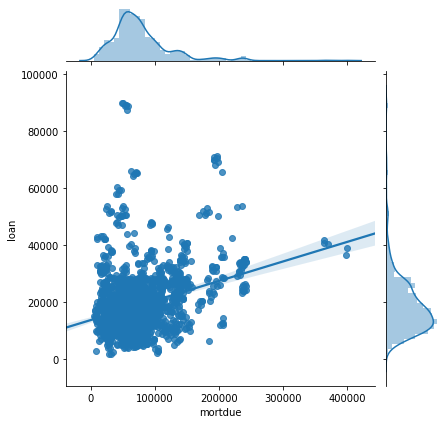

In [15]:
sns.jointplot(x="mortdue", y="loan",data=veri, kind="reg")

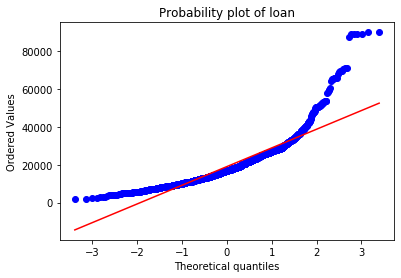

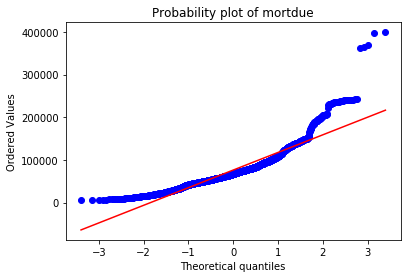

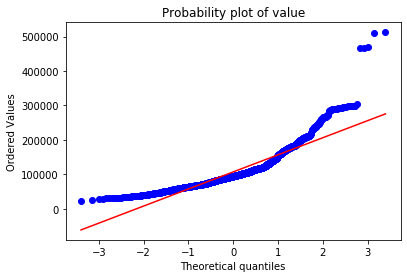

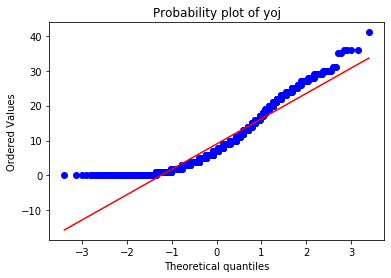

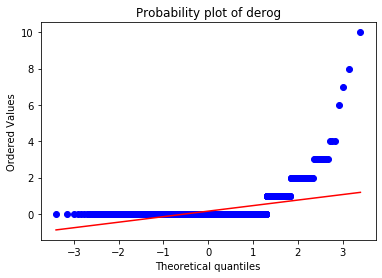

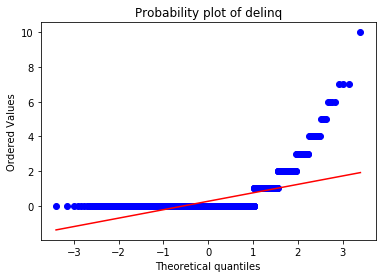

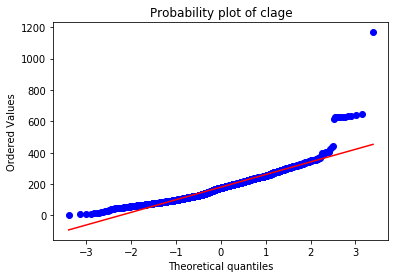

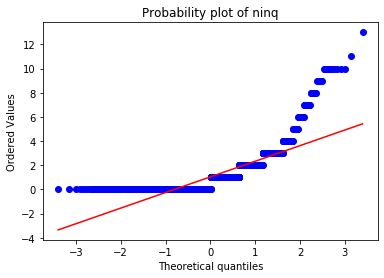

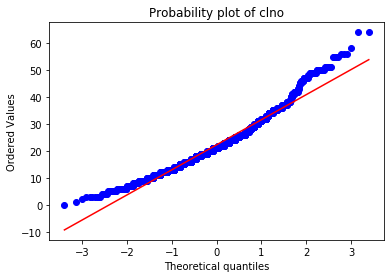

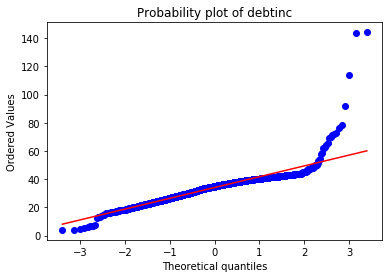

In [16]:
from matplotlib import pylab
from pylab import *
for i in veri.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        stats.probplot(veri[i], dist="norm",plot=pylab)
        pylab.title("Probability plot of " + i)
        pylab.show()
    

In [31]:
import statsmodels.api as sm
#Şimdi  valueyi mortdue ile açıklayalım
X = veri[["mortdue"]]

X[0:5]

,mortdue
153,94727.0
154,79240.0
155,241931.0
156,62989.0
157,25859.0


In [32]:
X=sm.add_constant(X)
X[0:5]

C:\Users\asus1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [33]:
y = veri["value"] #double p
y[0:5]

153    136877.0
154     96784.0
155     36486.0
156     76718.0
157     43684.0
Name: value, dtype: float64

In [34]:
import statsmodels.formula.api as smf

lm=smf.ols("value ~ mortdue",veri)
model=lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:29:16   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#parametreleri çekti B0 ve B1 i çektik
model.params

Intercept    26469.270925
mortdue          1.053617
dtype: float64

In [22]:
model.summary().tables[1]
#güven aralığını söylüyor


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.647e+04,1189.449,22.253,0.000,2.41e+04,2.88e+04
mortdue,1.0536,0.013,78.255,0.000,1.027,1.080


In [23]:
model.conf_int()

,0,1
Intercept,24136.594103,28801.947746
mortdue,1.027212,1.080021


In [24]:
print("Value =" + str("%.2f" % model.params[0])+ " + mortdue" + "*"+ str("%.2f" % model.params[1]))

Value =26469.27 + mortdue*1.05


In [25]:
model.predict(X)[0:10]

153    126275.218545
154    109957.856961
155    281371.808888
156     92835.532230
157     53714.744755
158    174321.192949
159    100969.453030
160    110139.079030
161    108816.790092
162     80478.715760
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [27]:
mse=mean_squared_error(y,model.fittedvalues)
mse

722569435.9837799

In [29]:
k_t = pd.DataFrame({"gercek_y":y[0:10], "tahmin_y":model.predict(X)[0:10]})
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

## hatalarım çok büyük çıktı

,gercek_y,tahmin_y,hata,hata_kare
153,136877.0,126275.218545,10601.781455,1.123978e+08
154,96784.0,109957.856961,-13173.856961,1.735505e+08
155,36486.0,281371.808888,-244885.808888,5.996906e+10
156,76718.0,92835.532230,-16117.532230,2.597748e+08
157,43684.0,53714.744755,-10030.744755,1.006158e+08
158,183533.0,174321.192949,9211.807051,8.485739e+07
159,97394.0,100969.453030,-3575.453030,1.278386e+07
160,114906.0,110139.079030,4766.920970,2.272354e+07
161,103016.0,108816.790092,-5800.790092,3.364917e+07
162,87025.0,80478.715760,6546.284240,4.285384e+07


In [37]:
import pandas as pd
#ad = pd.read_csv("hmelq.csv",usecols=[1,2,3,6,9,11])
##kategorik değişkenleri çıkardım,verimi yeniden okudum
ad = pd.read_csv("hmelq.csv",usecols=[1,2,3,6,7,8,9,10,11,12])
ad=ad.dropna()
df=ad.copy()
df.head()




,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [38]:
#sns.pairplot(df,kind="reg")  ###fit linear regression

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X=df.drop("value",axis=1)
y=df["value"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape


(1473, 9)

In [40]:
y_train.shape

(1473,)

In [41]:
print(X_test.shape)
print(y_test.shape)
training=y.copy()
training.head()

(632, 9)
(632,)


0    108355.0
1    127384.0
2     61266.0
3     71027.0
4     78358.0
Name: value, dtype: float64

In [42]:
y_train.head()

2594     84778.0
783      91722.0
2226    169881.0
1424     79477.0
678      65054.0
Name: value, dtype: float64

In [43]:
X_train.head()

,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc
2594,8700,30716.0,19.0,0.0,0.0,219.09,0.0,10.0,23.809
783,13200,69697.0,24.0,1.0,0.0,183.52,1.0,14.0,39.752
2226,32500,124548.0,16.0,0.0,0.0,129.52,1.0,17.0,28.851
1424,10400,63626.0,12.0,0.0,0.0,260.80,0.0,27.0,27.943
678,5500,52897.0,20.0,0.0,0.0,189.30,0.0,19.0,20.654


In [44]:
### tüm verileri valueye karşı soktuğumuzda; 
## loan, mortdue,yoj,clage,clno ve debtinc'in anlamlı değişken olduğunu görmekteyiz
lm=sm.OLS(y_train,X_train)
mdl=lm.fit()
mdl.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              3422.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                        0.00
Time:                        22:36:04   Log-Likelihood:                         -17014.
No. Observations:                1473   AIC:                                  3.405e+04
Df Residuals:                    1464   BIC:                                  3.409e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan           0.7477      0.061     12.275      0.000       0.628       0.867
mortdue        1.0195      0.017     58.468      0.000       0.985       1.054
yoj          335.9229     87.930      3.820      0.000     163.441     508.405
derog       2075.3854   1121.436      1.851      0.064    -124.408    4275.179
delinq     -1862.1958    892.285     -2.087      0.037   -3612.489    -111.903
clage         68.7031      7.395      9.291      0.000      54.198      83.208
ninq        -815.7441    427.615     -1.908      0.057   -1654.547      23.059
clno        -308.8115     75.137     -4.110      0.000    -456.199    -161.424
debtinc      190.9274     59.541      3.207      0.001      74.133     307.722
==============================================================================
Omnibus:                     1065.656   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79744.027
Skew:                          -2.674   Prob(JB):                         0.00
Kurtosis:                      38.647   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
import statsmodels.formula.api as smf
lm=smf.ols("value ~ loan+mortdue+yoj+clage+clno+debtinc",df)
model=lm.fit()
#parametreleri çekti B0 ve B1 i çektik
model.params
model.summary().tables[1]
#güven aralığını söylüyor
model.conf_int()

,0,1
Intercept,13113.761925,24100.617489
loan,0.641973,0.841191
mortdue,1.004493,1.058816
yoj,131.332788,425.166811
clage,44.124825,70.878457
clno,-609.627388,-362.883535
debtinc,-328.541926,-65.069137


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1256.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:37:15   Log-Likelihood:                -24302.
No. Observations:                2105   AIC:                         4.862e+04
Df Residuals:                    2098   BIC:                         4.866e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.861e+04   2801.204      6.643      0.000    1.31e+04    2.41e+04
loan           0.7416      0.051     14.600      0.000       0.642       0.841
mortdue        1.0317      0.014     74.487      0.000       1.004       1.059
yoj          278.2498     74.916      3.714      0.000     131.333     425.167
clage         57.5016      6.821      8.430      0.000      44.125      70.878
clno        -486.2555     62.910     -7.729      0.000    -609.627    -362.884
debtinc     -196.8055     67.175     -2.930      0.003    -328.542     -65.069
==============================================================================
Omnibus:                     1452.534   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110426.561
Skew:                          -2.511   Prob(JB):                         0.00
Kurtosis:                      38.125   Cond. No.                     4.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model.rsquared_adj

0.7815897991439502

In [49]:
model.fittedvalues[0:5]

0    100538.347330
1    124235.237344
2     78031.578529
3     88052.966895
4     85055.301938
dtype: float64

In [50]:
model.predict(X)[0:10]

0    100538.347330
1    124235.237344
2     78031.578529
3     88052.966895
4     85055.301938
5     68720.008998
6    105180.644681
7     62190.968479
8    147795.952069
9     93400.609381
dtype: float64

In [51]:
y[0:10]

0    108355.0
1    127384.0
2     61266.0
3     71027.0
4     78358.0
5     66978.0
6    110481.0
7     82054.0
8    135146.0
9     78275.0
Name: value, dtype: float64

In [52]:
k_t = pd.DataFrame({"gercek_y":y[0:10], "tahmin_y":model.predict(X)[0:10]})
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,108355.0,100538.347330,7816.652670,6.110006e+07
1,127384.0,124235.237344,3148.762656,9.914706e+06
2,61266.0,78031.578529,-16765.578529,2.810846e+08
3,71027.0,88052.966895,-17025.966895,2.898835e+08
4,78358.0,85055.301938,-6697.301938,4.485385e+07
5,66978.0,68720.008998,-1742.008998,3.034595e+06
6,110481.0,105180.644681,5300.355319,2.809377e+07
7,82054.0,62190.968479,19863.031521,3.945400e+08
8,135146.0,147795.952069,-12649.952069,1.600213e+08
9,78275.0,93400.609381,-15125.609381,2.287841e+08


In [53]:
##dummy yaratıp birde öyle model üretelim
ad = pd.read_csv("hmelq.csv")
ad=ad.dropna()
df=ad.copy()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [55]:
##dummylerim
import pandas as pd
dms=pd.get_dummies(df[['bad','reason', 'job']])
dms.head()

,bad,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,1,0,1,0,0,0,0,0
154,0,1,0,1,0,0,0,0,0
155,0,1,0,1,0,0,0,0,0
156,0,0,1,1,0,0,0,0,0
157,0,1,0,1,0,0,0,0,0


In [57]:
dms = pd.get_dummies(df[['bad','reason', 'job']])
dms.head()
y=df["value"]
X_ = df.drop(["value","bad","reason","job"],axis=1).astype("float64")
X_.head()
X = pd.concat([X_, dms[["bad","reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis = 1)
X = pd.concat([X,df["value"]],axis=1)
X.head()
## valueyi sonra concat et
## train ve testi 90'a 10 şeklinde ayır

,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,bad,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,value
153,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,1,0,1,0,0,0,0,0,136877.0
154,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,1,0,1,0,0,0,0,0,96784.0
155,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,1,0,1,0,0,0,0,0,36486.0
156,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,0,1,1,0,0,0,0,0,76718.0
157,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,1,0,1,0,0,0,0,0,43684.0


In [59]:
lm=sm.OLS(y,X)
mdl=lm.fit()
mdl.summary()

#Modele bakıldığında loan,mortdue,yoj,clno,debtinc,bad,job_Mgr,job_Office,job_Other,job_Self,job_ProfEx 'in anlamlı olduğu söylenir

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.344e+31
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:41:23   Log-Likelihood:                 43840.
No. Observations:                2018   AIC:                        -8.764e+04
Df Residuals:                    2000   BIC:                        -8.754e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            1.707e-15   2.12e-16      8.045      0.000    1.29e-15    2.12e-15
mortdue         3.747e-16   9.81e-17      3.820      0.000    1.82e-16    5.67e-16
yoj            -6.821e-13   2.79e-13     -2.442      0.015   -1.23e-12   -1.34e-13
derog          -9.663e-13   3.61e-12     -0.267      0.789   -8.06e-12    6.12e-12
delinq         -2.728e-12   2.68e-12     -1.017      0.309   -7.99e-12    2.53e-12
clage           4.663e-14   2.54e-14      1.833      0.067   -3.25e-15    9.65e-14
ninq           -9.095e-13   1.32e-12     -0.688      0.492    -3.5e-12    1.68e-12
clno            6.963e-13   2.36e-13      2.949      0.003    2.33e-13    1.16e-12
debtinc        -8.527e-13   2.57e-13     -3.319      0.001   -1.36e-12   -3.49e-13
bad            -3.524e-11   7.77e-12     -4.536      0.000   -5.05e-11      -2e-11
reason_DebtCon -1.091e-11   8.69e-12     -1.256      0.209    -2.8e-11    6.13e-12
reason_HomeImp  7.276e-12   8.96e-12      0.812      0.417   -1.03e-11    2.48e-11
job_Mgr         2.365e-11   6.07e-12      3.894      0.000    1.17e-11    3.56e-11
job_Office      1.637e-11    5.5e-12      2.977      0.003    5.59e-12    2.72e-11
job_Other       9.095e-12   4.54e-12      2.002      0.045    1.86e-13     1.8e-11
job_ProfEx     -1.273e-11   5.09e-12     -2.503      0.012   -2.27e-11   -2.76e-12
job_Sales      -7.731e-12   1.48e-11     -0.522      0.602   -3.68e-11    2.13e-11
job_Self       -2.183e-11   1.18e-11     -1.846      0.065    -4.5e-11    1.36e-12
value              1.0000   8.16e-17   1.23e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      491.129   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2539.144
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       8.078   Cond. No.                     1.31e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
import statsmodels.formula.api as smf
lm=smf.ols("value ~ loan+mortdue+yoj+clno+debtinc+bad+job_Mgr+job_Office+job_Other+job_Self+job_ProfEx",X)
model=lm.fit()
#parametreleri çekti B0 ve B1 i çektik
model.params
model.summary().tables[1]
#güven aralığını söylüyor
model.conf_int()

,0,1
Intercept,19246.789595,39795.811299
loan,0.574774,0.790973
mortdue,0.994873,1.051743
yoj,319.430450,610.632944
clno,-583.371087,-336.643629
debtinc,-322.653903,-45.878823
bad,-2679.016815,5256.476414
job_Mgr,-18134.694812,646.792041
job_Office,-11789.350835,6739.382654
job_Other,-13855.730140,4283.545268


In [63]:
model.rsquared_adj

0.790331189249429

In [64]:
model.fittedvalues[0:5]

153    118511.912088
154    100950.926210
155    261274.142208
156     76864.984502
157     53746.356354
dtype: float64

In [65]:
k_t = pd.DataFrame({"gercek_y":y[0:10], "tahmin_y":model.predict(X)[0:10]})
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
153,136877.0,118511.912088,18365.087912,3.372765e+08
154,96784.0,100950.926210,-4166.926210,1.736327e+07
155,36486.0,261274.142208,-224788.142208,5.052971e+10
156,76718.0,76864.984502,-146.984502,2.160444e+04
157,43684.0,53746.356354,-10062.356354,1.012510e+08
158,183533.0,168228.819534,15304.180466,2.342179e+08
159,97394.0,94057.615794,3336.384206,1.113146e+07
160,114906.0,101226.951188,13679.048812,1.871164e+08
161,103016.0,91085.828102,11930.171898,1.423290e+08
162,87025.0,75036.089159,11988.910841,1.437340e+08


In [71]:
#detect outliers, errorların outlierlarını detect ediyoruz aslında, datanın değil, çünkü biz errorunda normal dağılımdan geldiğini kabul ediyoruz ya
influence=model.get_influence()
influence

In [73]:
resid_student = influence.resid_studentized_external
(cooks,p) = influence.cooks_distance
(dffits,p) = influence.dffits
leverage= influence.hat_matrix_diag
leverage

array([0.00420796, 0.00413455, 0.01332588, ..., 0.02573362, 0.06351039,
       0.02806898])

Leverage vs. Studentized Residuals


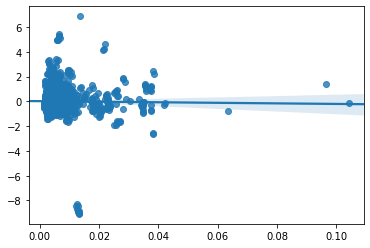

In [74]:
print("Leverage vs. Studentized Residuals")
##çizdirip bakıyoruz,modeldeki residualların dağılımına,ayrık uzak residuallar var, outlier var, diyorumki ya normal dağılımdan gelmiyor ya da constanst varyans olmayabilir, şimdi test edicez bunu belkide modeli pek etkileyecek seviyede değildir
##leverage bizim verilerimizden gelen,pearson ise modelden gelen
sns.regplot(leverage, model.resid_pearson, fit_reg=True)  #True olursa regresyon çizgisini de çizer, line fit eder

In [78]:
advres=pd.concat([df, pd.Series(model.resid , name="resid"),
                 pd.Series(model.predict(), name="predict")],axis=1)

model.predict()
advres.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,resid,predict
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118511.912088
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100950.926210
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261274.142208
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76864.984502
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53746.356354


C:\Users\asus1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\asus1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


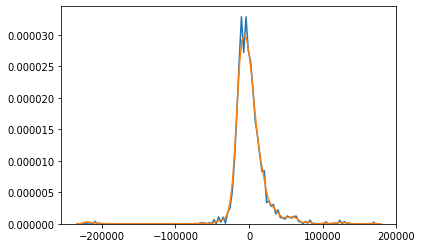

In [79]:
#model.resid
sns.kdeplot(np.array(advres.resid),bw=10)
sns.distplot(np.array(advres.resid),hist=False)
##kırmızı olan residualların dağılımı

C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


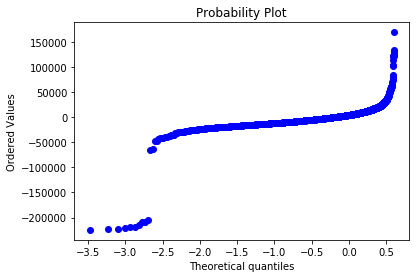

In [80]:
#probability plotunu çizdirelim,beklenen line fit etmiş olması
import pylab
stats.probplot(advres.resid, dist="norm",plot=pylab)
pylab.show()

In [81]:
##shapiro yapalım residuallara

from scipy.stats import shapiro
advres=advres.dropna()
stat,p=shapiro(advres.resid)
print(stat,p)
alpha=0.05
if p > alpha:
    print("Hatalar normal dağılımdan geliyor (Fail to reject H0)")
else:
    print("Hatalar normal dağılımdan gelmemektedir (Reject H0)")

0.6269349455833435 0.0
Hatalar normal dağılımdan gelmemektedir (Reject H0)


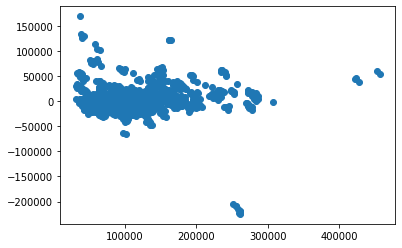

In [82]:
resid=model.resid
plt.scatter(model.predict(),resid)
##residuallarımızın scatter plot dağılımı